# Neural Network Basics

### Understanding Single Neurons

In [5]:
inputs = [1, 2, 3]
weights = [0.2, 0.8, -0.5]
bias = 2

output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + bias
print(output)

2.3


In [6]:
inputs = [1, 2, 3, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2

output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + inputs[3]*weights[3] + bias
print(output)

4.8


### Understanding Multiple Neurons

In [7]:
#say we have 4 inputs and 3 outputs
inputs = [1, 2, 3, 2.5]
weights1 = [0.2, 0.8, -0.5, 1.0]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]
bias1 = 2
bias2 = 3
bias3 = 0.5

output = [inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2] + inputs[3]*weights1[3] + bias1,
         inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2] + inputs[3]*weights2[3] + bias2,
         inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2] + inputs[3]*weights3[3] + bias3,]
print(output)

[4.8, 1.21, 2.385]


In [10]:
#Better way - 4 inputs and 3 outputs
inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1.0],[0.5, -0.91, 0.26, -0.5],[-0.26, -0.27, 0.17, 0.87]]
biases = [2,3,0.5]

layer_outputs = [] #output of current layer
for neuron_weights, neuron_bias in zip(weights,biases):
    neuron_output = 0 #output of given neuron
    for n_input, weight in zip(inputs, neuron_weights):
        neuron_output += n_input*weight
    neuron_output += neuron_bias
    layer_outputs.append(neuron_output)

print(layer_outputs)

[4.8, 1.21, 2.385]


### Understanding and Adding Numpy

In [11]:
import numpy as np
#single neuron
inputs = [1, 2, 3, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2

output = np.dot(weights, inputs) + bias
print(output)

4.8


In [16]:
#single layer with 3 neurons
inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1.0],[0.5, -0.91, 0.26, -0.5],[-0.26, -0.27, 0.17, 0.87]]
biases = [2,3,0.5]

output = np.dot(weights, inputs) + biases #weights first coz that defines the shape of o/p of np.dot (similar to A.B = A(B.T))
print(output)

[4.8   1.21  2.385]


### Understanding Batches/Batch Input


In [23]:
#To train faster
#Why not whole batch at once - to prevent overfit. To allow to fit to only subset of data. Helps in generalization.

inputs = [[1, 2, 3, 2.5],[2.0, 5.0, -1.0, 2.0],[-1.5, 2.7, 3.3, -0.8]]
weights = [[0.2, 0.8, -0.5, 1.0],[0.5, -0.91, 0.26, -0.5],[-0.26, -0.27, 0.17, 0.87]]
biases = [2,3,0.5]

output = np.dot(inputs, np.array(weights).T) + biases
print(output)

#In the output (3X3)
#3 Rows represent 3 Outputs corresponding to 3 Inputs
#3 Columns represent 3 neurons

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


### Adding Another Layer

In [26]:
inputs = [[1, 2, 3, 2.5],[2.0, 5.0, -1.0, 2.0],[-1.5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1.0],[0.5, -0.91, 0.26, -0.5],[-0.26, -0.27, 0.17, 0.87]]
biases = [2,3,0.5]

weights2 = [[0.1, -0.14, 0.5],[-0.5, 0.12, -0.33],[-0.44, 0.73, -0.13]] #3 weights for each neuron cos 3D output of previous layer
biases2 = [-1,2,-0.5]

layer1_output = np.dot(inputs, np.array(weights).T) + biases

layer2_output = np.dot(layer1_output, np.array(weights2).T) + biases2

print(layer2_output)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


In [11]:
#instead convert everything to an object

X = [[1, 2, 3, 2.5],[2.0, 5.0, -1.0, 2.0],[-1.5, 2.7, 3.3, -0.8]]  #just changing inputs name to X (common notation)

import numpy as np
np.random.seed(0)

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = np.random.randn(n_inputs, n_neurons) * 0.1  #because when some values are above 1 #we take inputsXneurons so that we don't need to take transpose of weights later on
        self.baises = np.zeros((1,n_neurons))  #remember when we represented number of neurons with number of columns
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.baises

        
#creating object of above class
layer1 = Layer_Dense(4,5)

#another object
layer2 = Layer_Dense(5,2)

layer1.forward(X)
print(layer1.output)

layer2.forward(layer1.output)
print(layer2.output)

[[ 0.10758131  1.03983522  0.24462411  0.31821498  0.18851053]
 [-0.08349796  0.70846411  0.00293357  0.44701525  0.36360538]
 [-0.50763245  0.55688422  0.07987797 -0.34889573  0.04553042]]
[[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


### Using Activation Functions

In [18]:
#Understanding ReLU Activation Function

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output1 = []
output2 = []

for i in inputs:
    if i>0:
        output1.append(i)
    elif i<=0:
        output1.append(0)

for i in inputs:
    output2.append(max(0,i))
        
print(output1)
print(output2)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]
[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


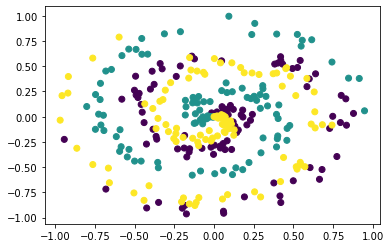

In [29]:
#Creating random data

import matplotlib.pyplot as plt

def create_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X,y

X,y = create_data(100,3)
# print(X)
# print(y)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [40]:
#Generating output through Neural Network using above input data

import numpy as np
np.random.seed(0)

#Creating Data

def create_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X,y

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = np.random.randn(n_inputs, n_neurons) * 0.1  #because when some values are above 1 #we take inputsXneurons so that we don't need to take transpose of weights later on
        self.baises = np.zeros((1,n_neurons))  #remember when we represented number of neurons with number of columns
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.baises

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0,inputs)
        
X,y = create_data(100,3)

#creating object of above class
layer1 = Layer_Dense(2,5)
layer1.forward(X)

activation1 = Activation_ReLU()
activation1.forward(layer1.output)

print(activation1.output)

# can add another layer

# layer2 = Layer_Dense(5,2)
# layer2.forward(activation1.output)
# activation2 = Activation_ReLU()
# activation2.forward(layer2.output)
# print(activation2.output)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.65504526e-04
  4.56845892e-05]
 [0.00000000e+00 5.93467943e-05 0.00000000e+00 2.03573189e-04
  6.10024276e-04]
 ...
 [1.13291515e-01 0.00000000e+00 0.00000000e+00 8.11079627e-02
  0.00000000e+00]
 [1.34588354e-01 0.00000000e+00 3.09493973e-02 5.66337522e-02
  0.00000000e+00]
 [1.07817915e-01 0.00000000e+00 0.00000000e+00 8.72561871e-02
  0.00000000e+00]]


In [47]:
#Understanding Exponential Activation Function

import math
E = math.e

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = []

for i in inputs:
    output.append(E**i)

#now normalizing these exponential values

norm_base = sum(output)
norm_values = []

for value in output:
    norm_values.append(value/norm_base)

print(norm_values)
print(sum(norm_values)) #sum of normalized values must be 1

[0.020848118342447427, 0.1540479159894891, 0.007669594125295656, 0.5652475047939215, 0.0014011084828631612, 0.062631208787595, 0.18815454947838817, 7.755658419097841e-46]
1.0


In [53]:
#Converting above Exponential Activation function to Numpy
# NOTE : The combination of this Exponentiation and Normalization is called SOFTMAX Function

import math
import numpy as np

E = math.e

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = np.exp(inputs)

#now normalizing these exponential values

norm_values = output/(np.sum(output))

print(norm_values)
print(np.sum(norm_values))

[2.08481183e-02 1.54047916e-01 7.66959413e-03 5.65247505e-01
 1.40110848e-03 6.26312088e-02 1.88154549e-01 7.75565842e-46]
1.0


In [61]:
#Converting above to batch Input

import numpy as np

inputs = [[4.8, 1.21, 2.385],
          [8.9, -1.81, 0.2],
          [1.41, 1.051, 0.026]]

output = np.exp(inputs)

#now normalizing these exponential values

norm_values = output/np.sum(output, axis = 1, keepdims=True) #axis1 = sum of elements row wise, keepdimsTrue = give output also row wise

print(norm_values)

[[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]


NOTE:  The exponential values can get very high and go beyond bounds. Hence we subtract the largest number from the input data from all the data.
This gives all the data with max data value 0.
This gives max exponential value = 1.
Hence the exponential value of the data is reduced to the range (0,1).

With above implementation of subtraction of largest value. We eliminate the overflow error and still the result after Softmax will be same as original data.

In [64]:
#Using Softmax Activation function in Neural Network + Subtraction method on Input data

import numpy as np
np.random.seed(0)

#Creating Data

def create_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X,y

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = np.random.randn(n_inputs, n_neurons) * 0.1  #because when some values are above 1 #we take inputsXneurons so that we don't need to take transpose of weights later on
        self.baises = np.zeros((1,n_neurons))  #remember when we represented number of neurons with number of columns
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.baises

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0,inputs)

class Activation_Softmax:
    def forward(self, inputs):
        self.output = np.exp(inputs - np.max(inputs, axis = 1, keepdims=True))
        self.output = self.output/np.sum(self.output, axis = 1, keepdims=True)

        
X,y = create_data(100,3)

#creating object of above class
layer1 = Layer_Dense(2,3)
layer1.forward(X)

activation1 = Activation_ReLU()
activation1.forward(layer1.output)

layer2 = Layer_Dense(3,3)
layer2.forward(activation1.output)

activation2 = Activation_Softmax()
activation2.forward(layer2.output)

print(activation2.output[:5]) #taking output of first 5 data points out of the total 100 data

[[0.33333333 0.33333333 0.33333333]
 [0.33331734 0.33331832 0.33336434]
 [0.3332888  0.33329153 0.33341967]
 [0.33325941 0.33326395 0.33347665]
 [0.33323311 0.33323926 0.33352763]]


In [68]:
#Understanding the -log function

import math

softmax_output = [0.7, 0.2, 0.1]
target_class = 0
target_output = [1, 0, 0]

loss = -(math.log(softmax_output[0])*target_output[0]+
         math.log(softmax_output[1])*target_output[1]+
         math.log(softmax_output[2])*target_output[2])

# print(loss)

print(-math.log(0.9))
print(-math.log(0.7))
print(-math.log(0.5))
print(-math.log(0.3))
print(-math.log(0.1))

#notice the pattern of -log function

0.10536051565782628
0.35667494393873245
0.6931471805599453
1.2039728043259361
2.3025850929940455


In [73]:
#Understanding the Loss Function - Categorical Cross Entropy Loss
#Working with Softmax Output

import numpy as np

softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])  #3 neuron outputs (column 1,2,3) for 3 data samples (row 1,2,3)

class_targets = [0,1,1]  #True class of all 3 samples

a = softmax_outputs[[0,1,2], class_targets]
#OR
a = softmax_outputs[range(len(softmax_outputs)), class_targets]


#Calculating -log for losses
loss = -np.log(a)
# print(loss)

#Calculating avg loss
avg_loss = np.mean(loss)
print(avg_loss)

0.38506088005216804


NOTE : -log(0) is infinite. How to solve that problem?

To solve this, we clip the values to 1e-07 whose -log value is 16.11--- to (1 - 1e-07) whose -log value is 1.

In [75]:
a = [0, 0.5, 0.9]
a = np.clip(a, 1e-7, 1 - 1e-7)
print(a)

[1.e-07 5.e-01 9.e-01]


In [77]:
#Calculating Loss for a Neural Network for Batch Input

import numpy as np
np.random.seed(0)

#Creating Data

def create_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X,y

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = np.random.randn(n_inputs, n_neurons) * 0.1  #because when some values are above 1 #we take inputsXneurons so that we don't need to take transpose of weights later on
        self.baises = np.zeros((1,n_neurons))  #remember when we represented number of neurons with number of columns
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.baises

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0,inputs)

class Activation_Softmax:
    def forward(self, inputs):
        self.output = np.exp(inputs - np.max(inputs, axis = 1, keepdims=True))
        self.output = self.output/np.sum(self.output, axis = 1, keepdims=True)

class Loss:
    def calculate(self, output, y):  #output = predicted values after softmax, y = true values
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

class Loss_CategoricalCrossEntropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        #we need out program to work on both type of definition of true output. A.) Scalar target values = [1,0] , B.) OneHot Encoding type target values = [[0,1],[1,0]].  
        
        if len(y_true.shape) == 1: #means scalar target values are provided
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)
        
        negetive_log_likelihood = -np.log(correct_confidences)
        return negetive_log_likelihood
     
            
X,y = create_data(100,3)

#creating object of above class
layer1 = Layer_Dense(2,3)
layer1.forward(X)

activation1 = Activation_ReLU()
activation1.forward(layer1.output)

layer2 = Layer_Dense(3,3)
layer2.forward(activation1.output)

activation2 = Activation_Softmax()
activation2.forward(layer2.output)

loss_function = Loss_CategoricalCrossEntropy()
loss = loss_function.calculate(activation2.output, y)


print(loss) #taking output of first 5 data points out of the total 100 data

1.0984449588022467


In [79]:
#Another way by combining both the Loss Classes

import numpy as np
np.random.seed(0)

#Creating Data

def create_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X,y

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = np.random.randn(n_inputs, n_neurons) * 0.1  #because when some values are above 1 #we take inputsXneurons so that we don't need to take transpose of weights later on
        self.baises = np.zeros((1,n_neurons))  #remember when we represented number of neurons with number of columns
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.baises

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0,inputs)

class Activation_Softmax:
    def forward(self, inputs):
        self.output = np.exp(inputs - np.max(inputs, axis = 1, keepdims=True))
        self.output = self.output/np.sum(self.output, axis = 1, keepdims=True)


class Loss_CategoricalCrossEntropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        #we need out program to work on both type of definition of true output. A.) Scalar target values = [1,0] , B.) OneHot Encoding type target values = [[0,1],[1,0]].  
        
        if len(y_true.shape) == 1: #means scalar target values are provided
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)
        
        negetive_log_likelihood = -np.log(correct_confidences)
        data_loss = np.mean(negetive_log_likelihood)
        return data_loss
            
X,y = create_data(100,3)

#creating object of above class
layer1 = Layer_Dense(2,3)
layer1.forward(X)

activation1 = Activation_ReLU()
activation1.forward(layer1.output)

layer2 = Layer_Dense(3,3)
layer2.forward(activation1.output)

activation2 = Activation_Softmax()
activation2.forward(layer2.output)

loss_function = Loss_CategoricalCrossEntropy()
loss = loss_function.calculate(activation2.output, y)


print(loss)

1.0984449588022467


In [81]:
#Calculating Accuracy

softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])  #3 neuron outputs (column 1,2,3) for 3 data samples (row 1,2,3)

class_targets = [0,0,1]  #True class of all 3 samples

class_predicted = np.argmax(softmax_outputs, axis=1)

accuracy = np.mean(class_predicted == class_targets)
print(accuracy)

0.6666666666666666
